# **K-Nearest Neighbors (KNN)**:
Here I am going to share with you everything I know about **KNN** and Classification.
All the information I gathered in these files was from free **educational resources** that I collected and improved with the help of my own knowledge.
A link to all the **resources** I used can be seen at the **end of this file**.
This collection is completely **free** and you can freely **share** it with other friends. I hope you can help increase your knowledge in **machine learning**.

## Contents: <a class="anchor" id="contents"></a>
* [What is KNN?](#what_is_knn)
* [About Iris Dataset](#iris)
* [Classification](#classification)
* [Model Evaluation](#model_evaluation)
* [KNN Regression](#knn_reg)
* [Resources](#resources)

## -What is KNN? <a class="anchor" id="what_is_knn"></a>
**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

### Distance Method:

**KNN Algorithm** uses the **Euclidean distance** method to measure between points to identify the nearest neighbors.

<img src="https://miro.medium.com/max/1400/1*yjxwoNqIwb1fXW26HvK_Kw.png">

#### The formula to calculate Euclidean distance is:

<img src="https://www.gstatic.com/education/formulas2/397133473/en/euclidean_distance.svg" width=250>

* [go to contents](#contents)

## -About Iris Dataset: <a class="anchor" id="iris"></a>

### `iris.csv`:

This is an example of a notebook to demonstrate concepts of Data Science. In this example we will do some exploratory data analysis on the famous Iris dataset.

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

* [go to contents](#contents)

## -Classification: <a class="anchor" id="classification"></a>

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

### Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")

### Reading The Dataset:

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Data Exploration:
Let's first have a **descriptive** exploration on our data.

In [3]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting Data:

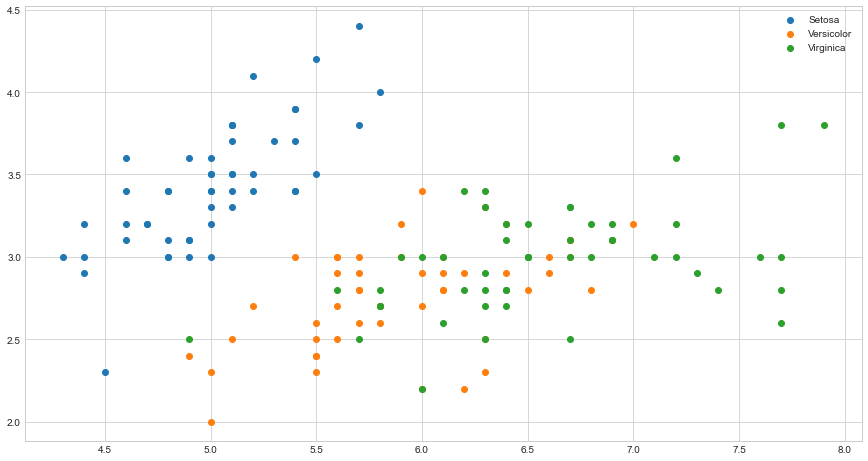

In [4]:
setosa = data[data["variety"] == "Setosa"]
versicolor = data[data["variety"] == "Versicolor"]
virginica = data[data["variety"] == "Virginica"]

plt.rcParams["figure.figsize"] = (15, 8)
plt.scatter(x=setosa["sepal.length"], y=setosa["sepal.width"], label="Setosa")
plt.scatter(x=versicolor["sepal.length"], y=versicolor["sepal.width"], label="Versicolor")
plt.scatter(x=virginica["sepal.length"], y=virginica["sepal.width"], label="Virginica")
plt.legend()
plt.show();

### Creating Train and Test Data:

In [5]:
from sklearn.model_selection import train_test_split

label = data["variety"]
data.drop("variety", axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, shuffle=True)

### Normalize Data:

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Modeling:

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

### Prediction:

In [8]:
prediction = model.predict(x_test)
prediction

array(['Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

* [go to contents](#contents)

## -Model Evaluation: <a class="anchor" id="model_evaluation"></a>

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


$$ accuracy = \frac{True Predictions}{n} $$

In [9]:
from sklearn.metrics import accuracy_score

print(f"Model Accuracy is: {accuracy_score(y_test, prediction)*100}%")

Model Accuracy is: 96.66666666666667%


### Confusion Matrix:

<img src="https://miro.medium.com/max/1224/1*TS2hsRr528UHQG9nDJhIcA.jpeg" width=500>

### Precision and Recall:

Let me introduce two new metrics (if you have not heard about it and if you do, perhaps just humor me a bit and continue reading?). Let me put it here for further explanation:

<img src="https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png" width=400>

Let me put in the confusion matrix and its parts here:

<img src="https://miro.medium.com/max/1400/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg" width=600 >

### Precision:

Immediately, you can see that Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.

Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

### Recall:
There you go! So Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.

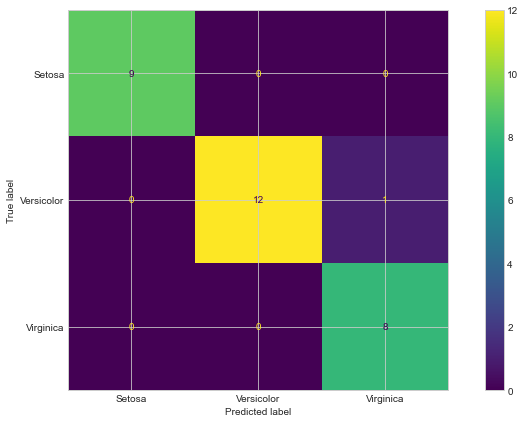

In [10]:
from sklearn.metrics import plot_confusion_matrix

plt.rcParams["figure.figsize"] = (13, 7)
plot_confusion_matrix(model, x_test, y_test)  
plt.show();

### F1-Score:
F1 Score is needed when you want to seek a balance between Precision and Recall. Right…so what is the difference between F1 Score and Accuracy then? We have previously seen that accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

<img src="https://miro.medium.com/max/564/1*T6kVUKxG_Z4V5Fm1UXhEIw.png">

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### K-Fold Cross Validation:
Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [12]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
scores = cross_val_score(knn, data, label, cv=5, scoring='accuracy')
print("Accuracy: {} (+/- {})".format(round(scores.mean(), 2), round(scores.std() * 2, 2)))

Accuracy: 0.97 (+/- 0.05)


* [go to contents](#contents)

## -KNN Regression: <a class="anchor" id="knn_reg"></a>
KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

### About boston Dataset:
### `boston.csv`:
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

*    CRIM - per capita crime rate by town
*    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*    INDUS - proportion of non-retail business acres per town.
*    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*    NOX - nitric oxides concentration (parts per 10 million)
*    RM - average number of rooms per dwelling
*    AGE - proportion of owner-occupied units built prior to 1940
*    DIS - weighted distances to five Boston employment centres
*    RAD - index of accessibility to radial highways
*    TAX - full-value property-tax rate per 10,000 dollors
*    PTRATIO - pupil-teacher ratio by town
*    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*    LSTAT - % lower status of the population
*    MEDV - Median value of owner-occupied homes in $1000's

In [13]:
data = pd.read_csv("boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
label = data["medv"]
data.drop("medv", axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, shuffle=True)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(f"MAE: {mean_absolute_error(y_test, prediction)}")

MAE: 4.053529411764706


## -Resources: <a class="anchor" id="resources"></a>

   *    Edx IBM Developer Skills Network, Machine Learning Course With Saaed Aghabozorgi & Joseph Santarcangelo.
   *    Maktabkhooneh Machine Learning With Jadi Course.
   *    https://builtin.com/data-science/regression-machine-learning
   *    https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

* [go to contents](#contents)